In [1]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import os

##导入数据


In [2]:
def input_data(path):
    x_data = []
    y_data = []
    filenames = os.listdir(path)
    for filename in filenames:
        y_data.append(int(filename.strip().split("_")[0]))
        with open(os.path.join(path,filename),"r",encoding='utf-8') as f:
            x_data.append([int(num) for line in f.readlines() for num in line.strip()])
#     print(len(x_data),len(x_data[0]))
    return (x_data,y_data)


In [3]:
x_train,y_train = input_data("./handwritingClass/trainingDigits")
x_test,y_test = input_data("./handwritingClass/testDigits")

In [4]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [5]:
predt = clf.predict(x_test)

In [6]:
np.sum(predt==y_test)/len(y_test)

0.9809725158562368

In [7]:
a = np.random.rand(3,4)
b = np.random.rand(5,4)
print(a)
print(b)
print(np.append(a,b).reshape(-1,4))

[[0.43839483 0.97441054 0.27685393 0.1002106 ]
 [0.74241118 0.67208512 0.07222851 0.08449303]
 [0.81780309 0.11522081 0.23384057 0.70762925]]
[[0.24559305 0.27126462 0.44500183 0.60843778]
 [0.79984903 0.0973458  0.04437278 0.53447931]
 [0.42904006 0.2891828  0.69689861 0.76752587]
 [0.41242572 0.64477282 0.91567987 0.80960834]
 [0.31396021 0.3747683  0.74349507 0.12757225]]
[[0.43839483 0.97441054 0.27685393 0.1002106 ]
 [0.74241118 0.67208512 0.07222851 0.08449303]
 [0.81780309 0.11522081 0.23384057 0.70762925]
 [0.24559305 0.27126462 0.44500183 0.60843778]
 [0.79984903 0.0973458  0.04437278 0.53447931]
 [0.42904006 0.2891828  0.69689861 0.76752587]
 [0.41242572 0.64477282 0.91567987 0.80960834]
 [0.31396021 0.3747683  0.74349507 0.12757225]]


In [8]:
x_data = np.append(x_train,x_test).reshape(-1,1024).astype(np.int32)
y_data = np.append(y_train,y_test)

In [29]:
krange = range(1,21)
error = []
for i in krange:
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,x_data,y_data,cv=10,scoring='accuracy')
    error.append(1-score.mean())
    print("第%s次已完成"%(i+1))


第2次已完成
第3次已完成
第4次已完成
第5次已完成
第6次已完成
第7次已完成
第8次已完成
第9次已完成
第10次已完成
第11次已完成
第12次已完成
第13次已完成
第14次已完成
第15次已完成
第16次已完成
第17次已完成
第18次已完成
第19次已完成
第20次已完成
第21次已完成


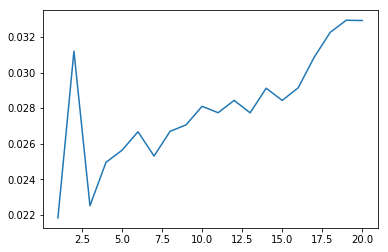

[0.021817469836995174, 0.03120631430410037, 0.02250702530996307, 0.024945042313429644, 0.025628561970725272, 0.026671648606720444, 0.025300759459028432, 0.026692302500714304, 0.02705993601728396, 0.028104139677552764, 0.02774238007886487, 0.02843805118976095, 0.027736438126482077, 0.029123167374161207, 0.028435765507743627, 0.029145907867813015, 0.03087149589291882, 0.03227130974218184, 0.03295139180362683, 0.03293564484992062]


In [32]:
import matplotlib.pyplot as plt
plt.plot(krange,error)
plt.show()
print(error)

In [33]:
knn = KNeighborsClassifier(3)
knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [34]:
pred = knn.predict(x_test)

In [35]:
np.sum(pred==y_test)/len(y_test)

0.9873150105708245